In [8]:
#importing the required libraries
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import mnist
import math

In [9]:
#loading the train data
(train_images , train_label) , (test) = mnist.load_data()
print(train_images.shape)
print(train_label.shape)

#Initialising the number of dimensions in the 1D array of a single datapoint
Num_of_Dimensions = train_images.shape[1] * train_images.shape[2]

#Converting every 28 * 28 matrix into a 1D matrix of length 784
train_images_1D = np.full((60000 , Num_of_Dimensions) , 0)
for i in range(60000):
    train_images_1D[i] = train_images[i].flatten()

image_sample100 = []
for i in range(10):
    image_sample100.append([]) #Creating 10 empty lists

for i in range(60000):
    label = train_label[i]
    if(len(image_sample100[label]) < 100): #Loading the first 100 images of each label 
        image_sample100[label].append(train_images_1D[i])  #Storing the image(1D array) according to its label to the list

X_data = []
for i in range(10):
    for j in range(100):
        X_data.append(image_sample100[i][j]) #Storing all the values in a 2D array irrespective of it's label


Num_of_sample_images = 1000

X_data = np.array(X_data ,dtype='float64') #Creating a numpy 2D array of size number of images 

X_data = X_data.transpose()
print(X_data.shape)

(60000, 28, 28)
(60000,)
(784, 1000)


In [10]:

X_mean = np.full((Num_of_Dimensions) , 0.0 , dtype= 'float64')

#Finding the mean of the data for centering 
for j in range(Num_of_Dimensions):
    X_mean[j] = np.sum(X_data[j])
X_mean = X_mean / Num_of_sample_images

#Centering 
for j in range(Num_of_Dimensions):
    X_data[j] = X_data[j] - X_mean[j]

X_data_transpose = X_data.transpose()

In [11]:
#Covariance matrix = X * X_Transpose of dimensions 784 * 784
Covariance_Matrix = np.matmul(X_data , X_data_transpose , dtype = 'float64')

#Adding a small value to the diagnal elements to prevent the error of floating point precision during eigen value calculations
for i in range(Num_of_Dimensions):
    Covariance_Matrix[i][i] += 0.0000001 

#Eigenvalues , Eigenvector
eigenvalues , eigenvectors = np.linalg.eigh(Covariance_Matrix )

#Sorting eigenvectors in the descending orders of their respective eigenvalues
eigenvectors = eigenvectors[:,np.flip(np.argsort(eigenvalues ))]

#Sorting the eigenvalues in descending order
eigenvalues = eigenvalues[np.flip(np.argsort(eigenvalues))]

Num_of_Components = 0 

Sum_until_ith_eigenvalue = 0

eigenvalues_sum = np.sum(eigenvalues)

#Finding the number of components for which variance is greater than 95%
for i in range(Num_of_Dimensions):
    Sum_until_ith_eigenvalue += eigenvalues[i]
    if(Sum_until_ith_eigenvalue >= 0.95 * eigenvalues_sum):
        Num_of_Components = i 
        break
print(Num_of_Components)

129


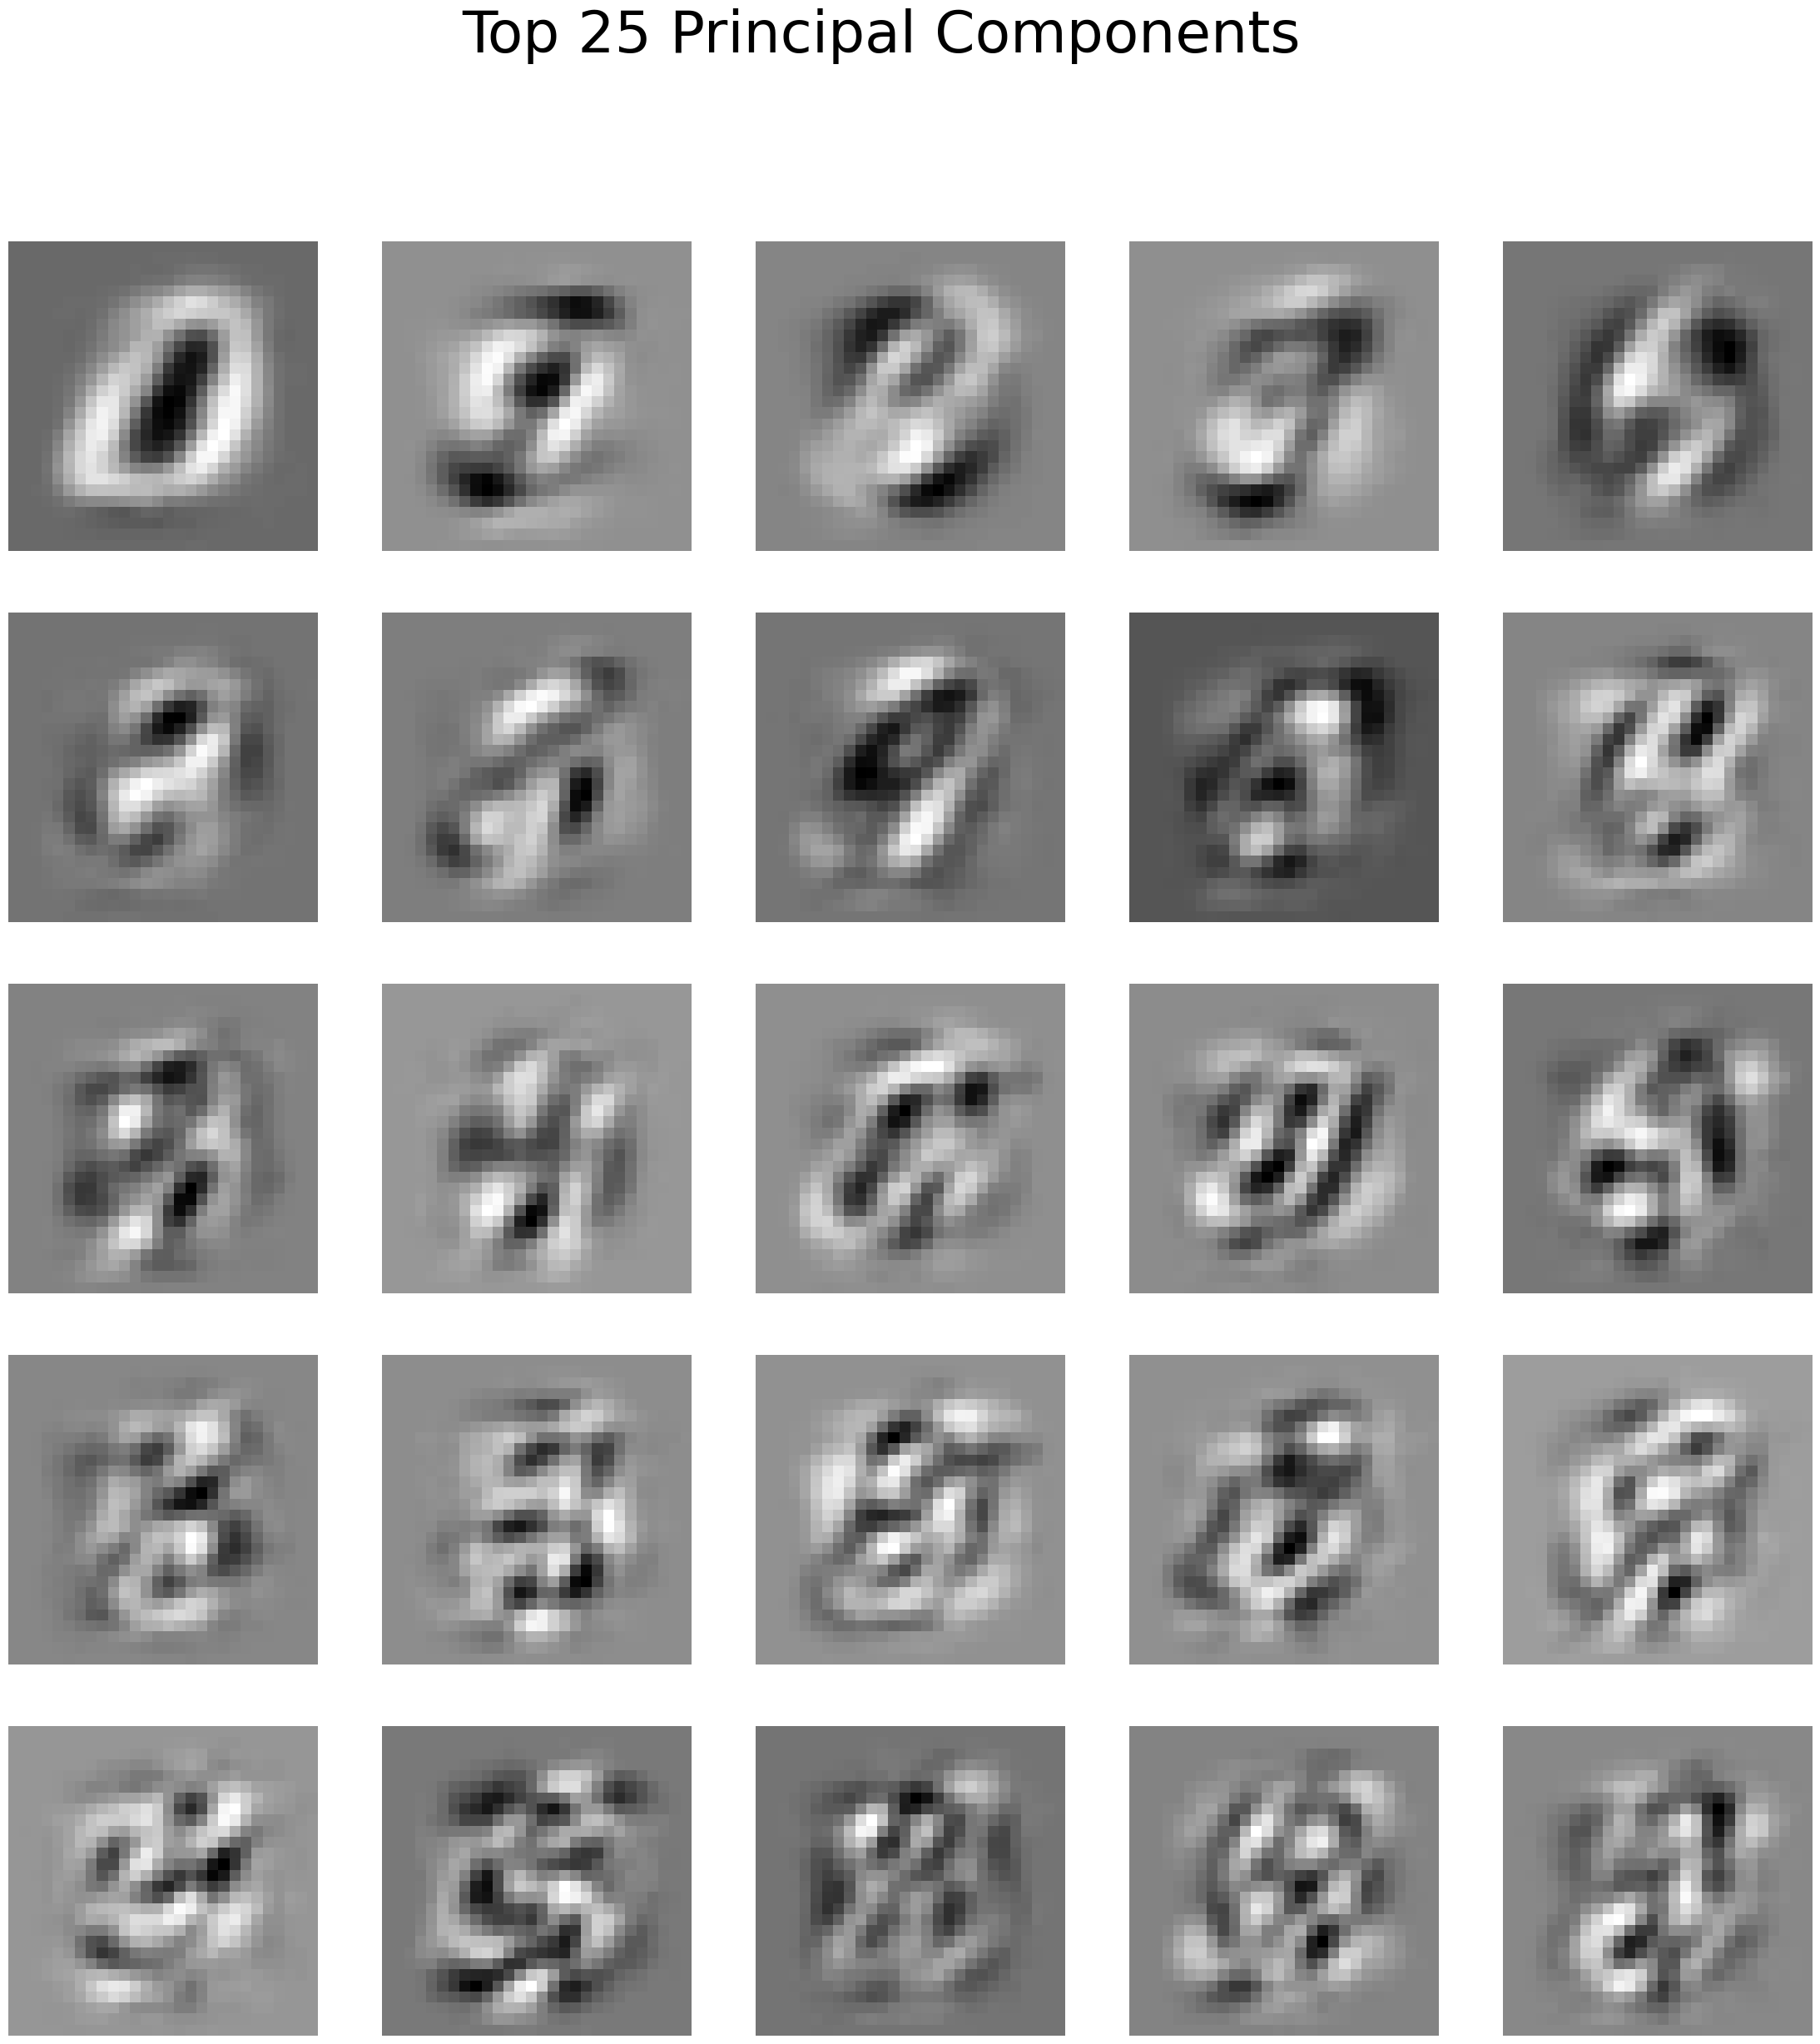

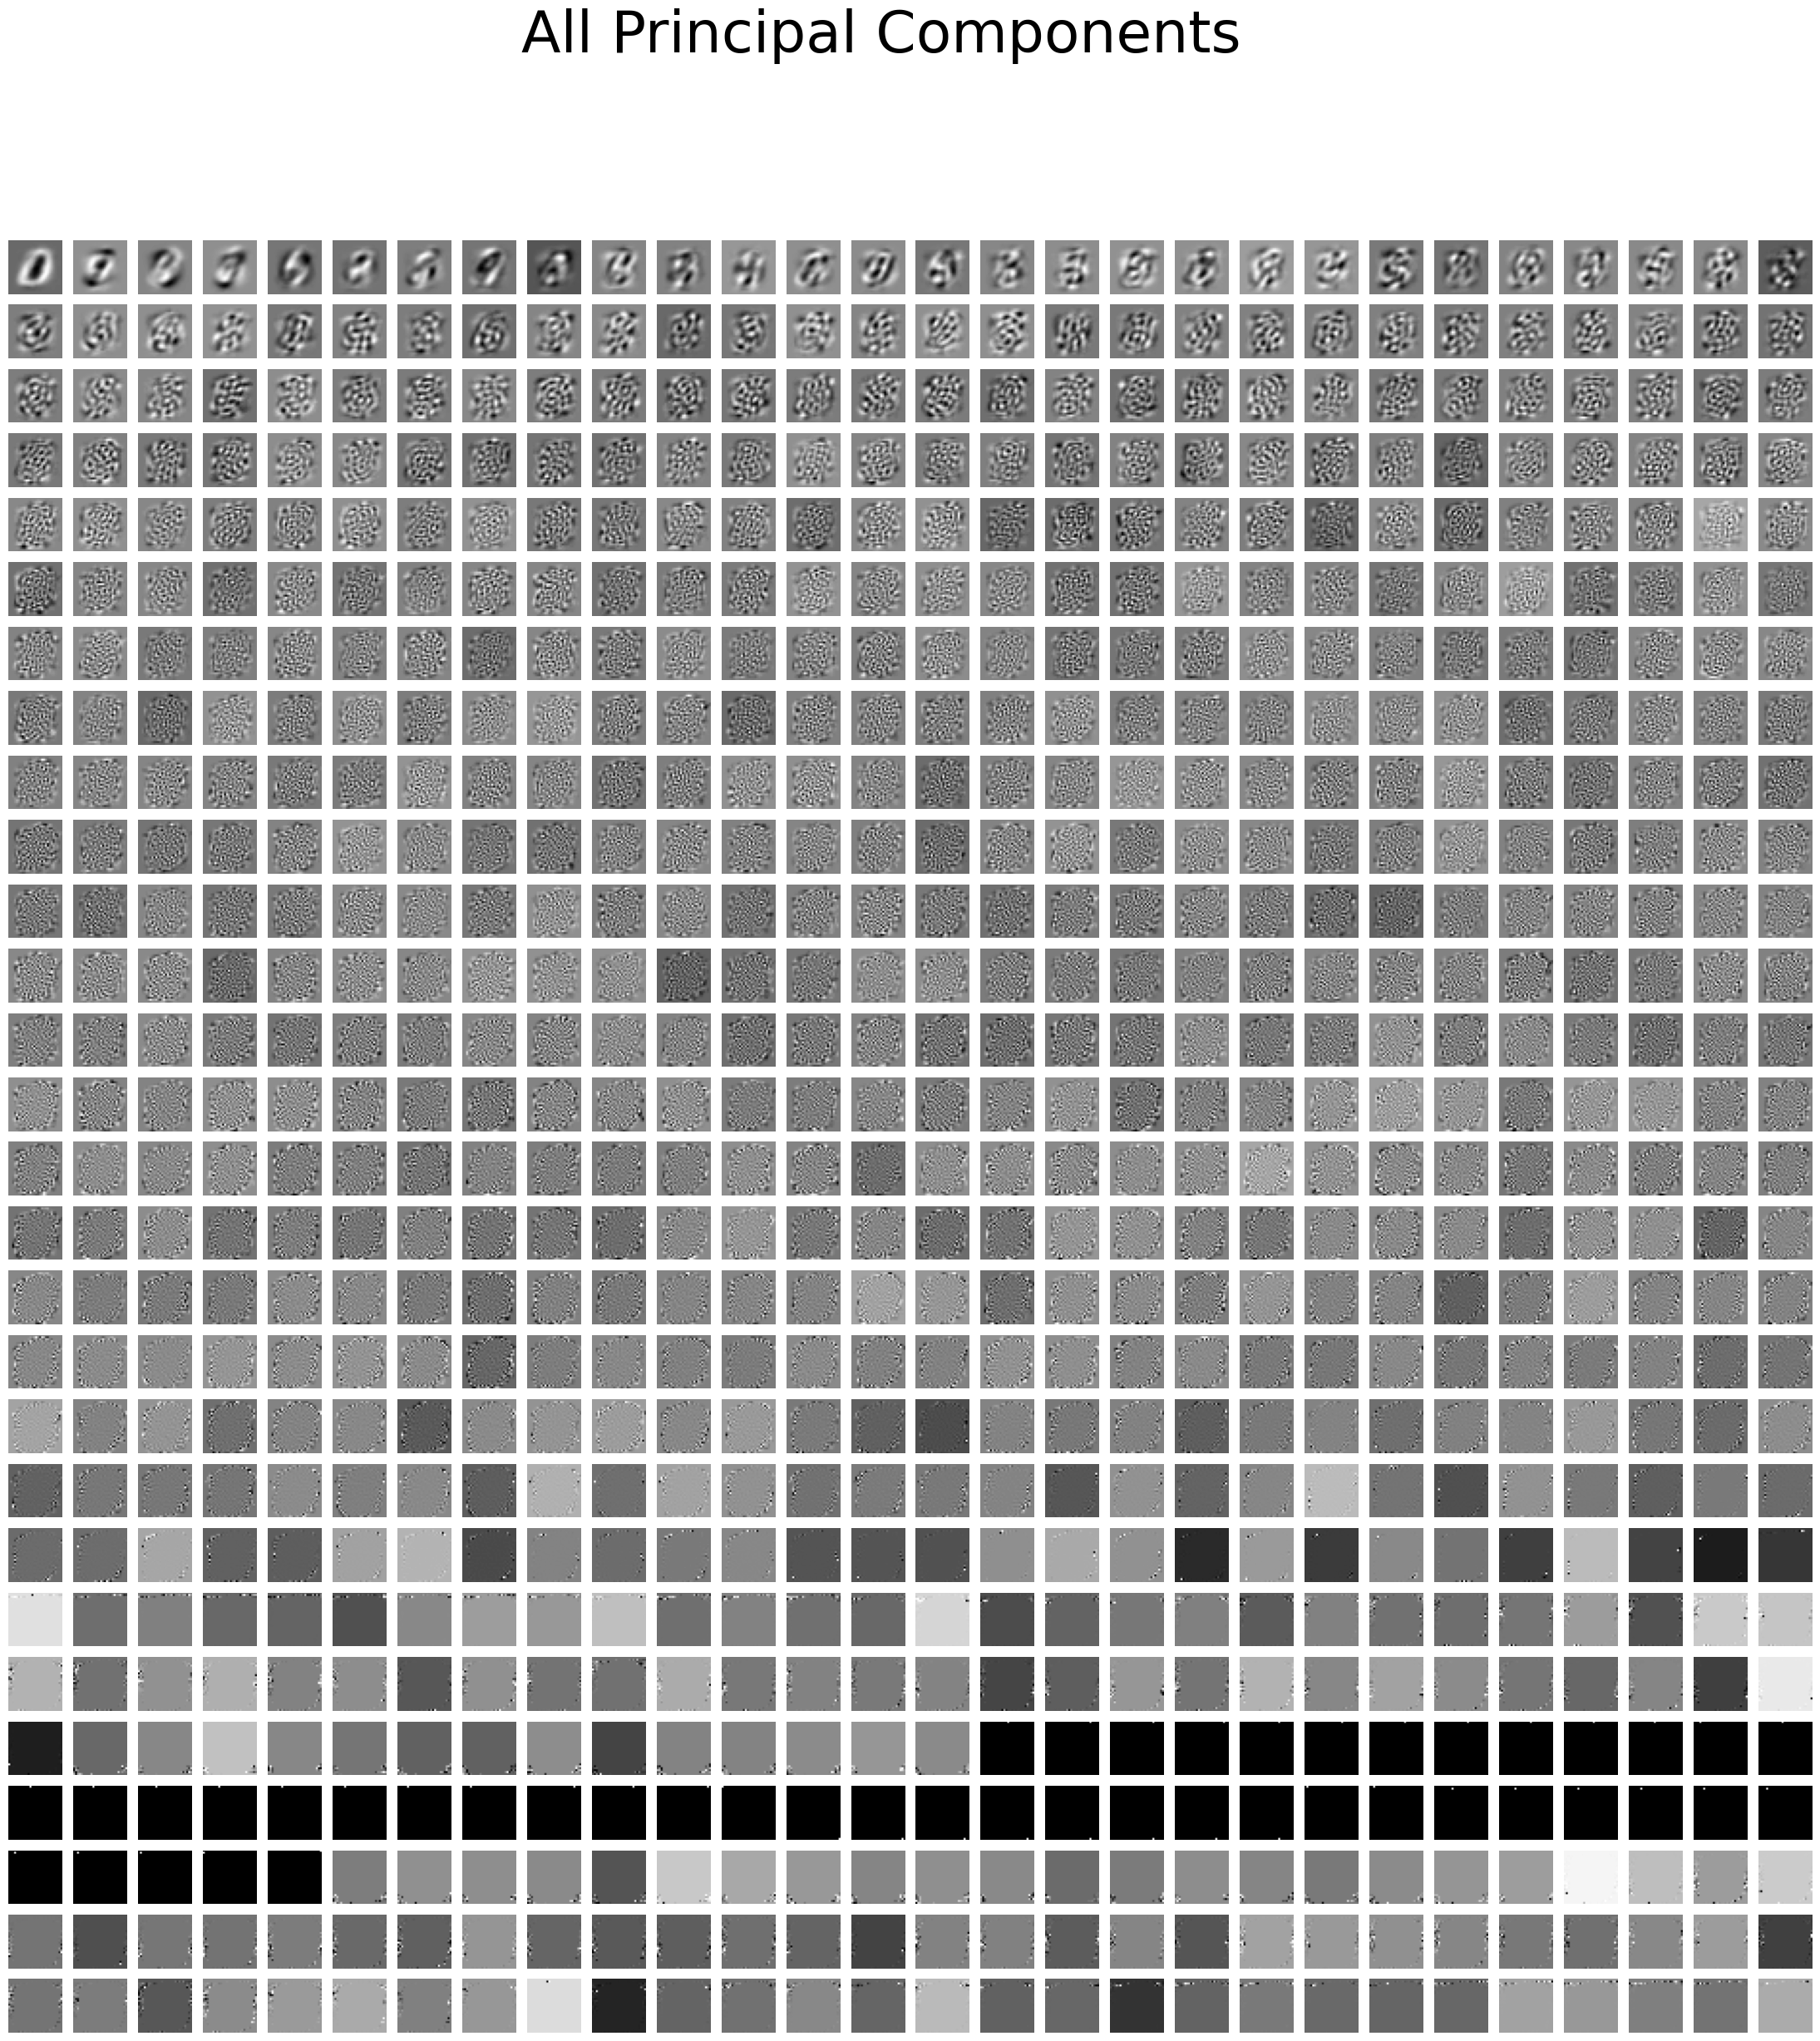

In [12]:
#plotting the top 25 Eigenvectors 
fig , axes = plt.subplots(5, 5 , figsize = (28 , 28))
for i in range(25):
    r = i // 5 
    c = i % 5
    axes[r][c].imshow(eigenvectors[:,i].reshape(28,28) , cmap = 'grey')
    axes[r][c].axis('off')
fig.suptitle("Top 25 Principal Components" , fontsize = 50)
'''plt.savefig("Top 25 Principal Components")'''
plt.show()


#Plotting all 784 eigenvectors
fig , axes = plt.subplots(28 , 28 , figsize = (28 , 28))
for i in range(len(eigenvalues)):
    r = i // 28 
    c = i % 28
    axes[r][c].imshow(eigenvectors[:,i].reshape(28,28) , cmap = 'grey')
    axes[r][c].axis('off')
fig.suptitle("All Principal Components" , fontsize = 50)
'''plt.savefig("All Principal Components")'''
plt.show()

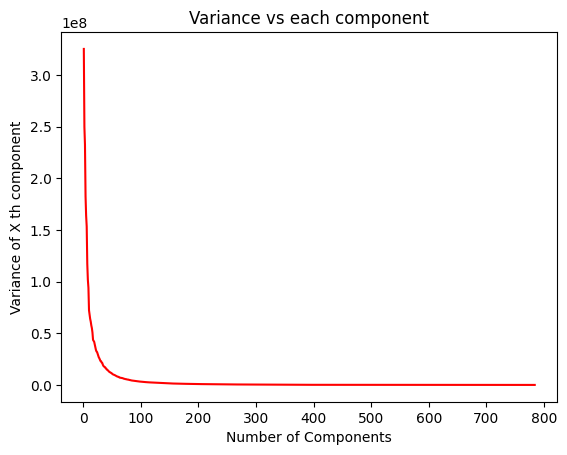

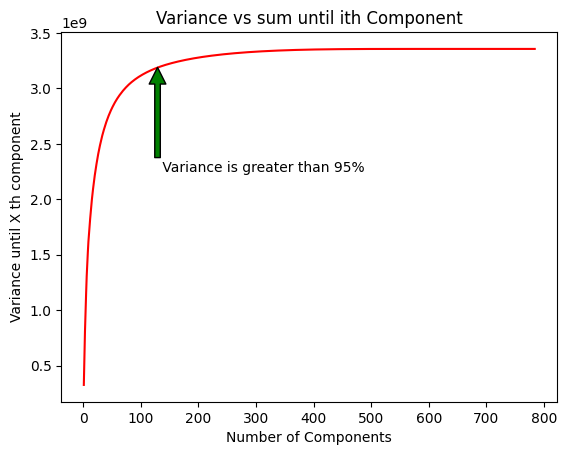

In [13]:
x_graph = np.linspace(1 , 784 , 784)
y_graph =  eigenvalues.copy()

#plotting the eigenvalue/Variance of i th largest value against i 
plt.plot(x_graph, y_graph, color="red")
plt.xlabel("Number of Components")
plt.ylabel("Variance of X th component")
plt.title("Variance vs each component")
plt.savefig("Variance explained by each component ")
plt.show()

#plotting the sum of eigenvalues/Variance untill the i th largest value against i
for i in range(1 , 784):
   y_graph[i] += y_graph[i-1]

plt.plot(x_graph, y_graph, color="red")
plt.annotate(" Variance is greater than 95%",xy= (Num_of_Components , y_graph[Num_of_Components]),xytext=(Num_of_Components , y_graph[20]) ,arrowprops = dict(facecolor ='green', shrink = 1))  
plt.xlabel("Number of Components")
plt.ylabel("Variance until X th component")
plt.title( "Variance vs sum until ith Component")
'''plt.savefig("Variance explained until i th Component")'''
plt.show()

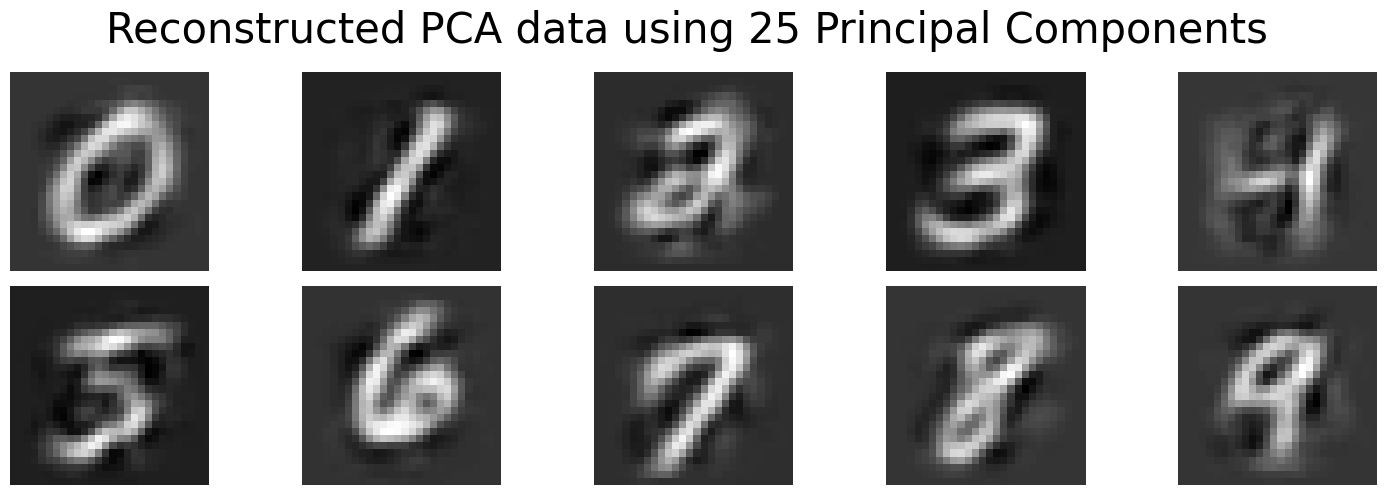

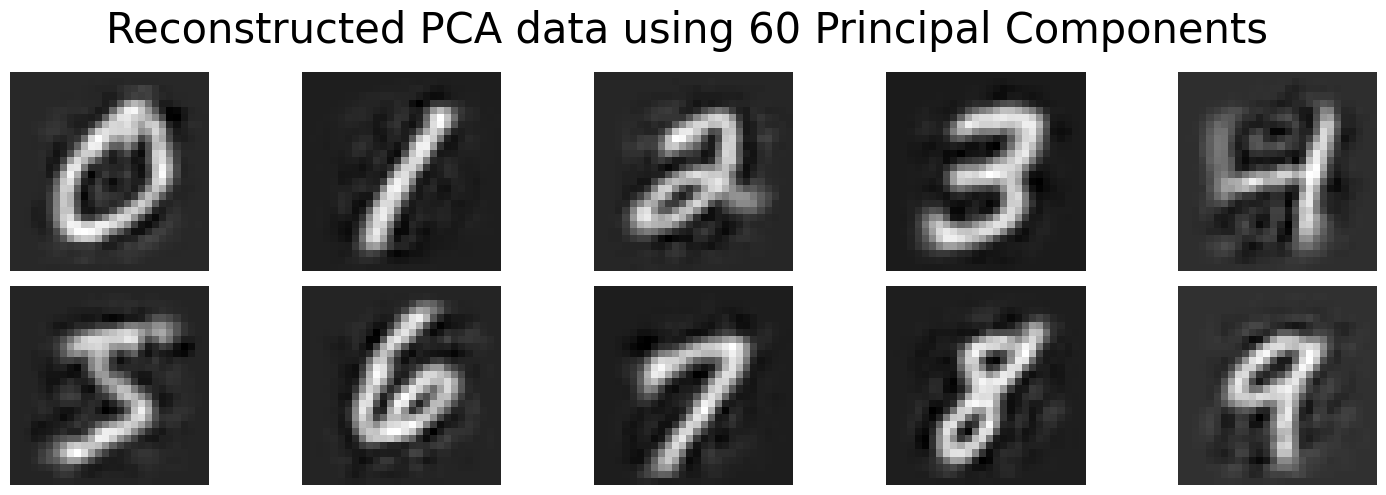

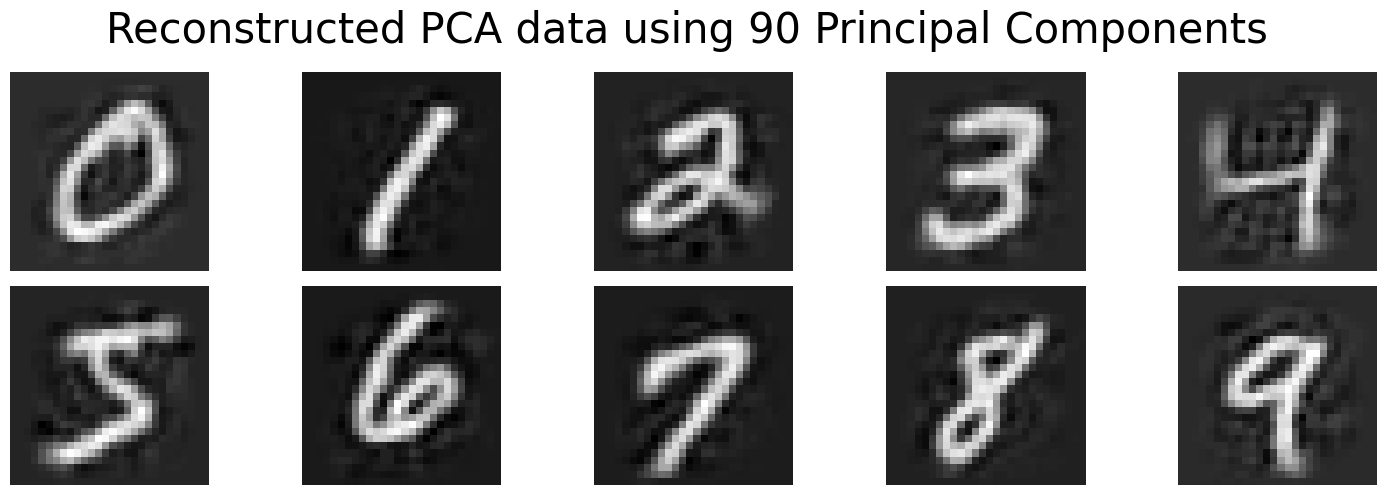

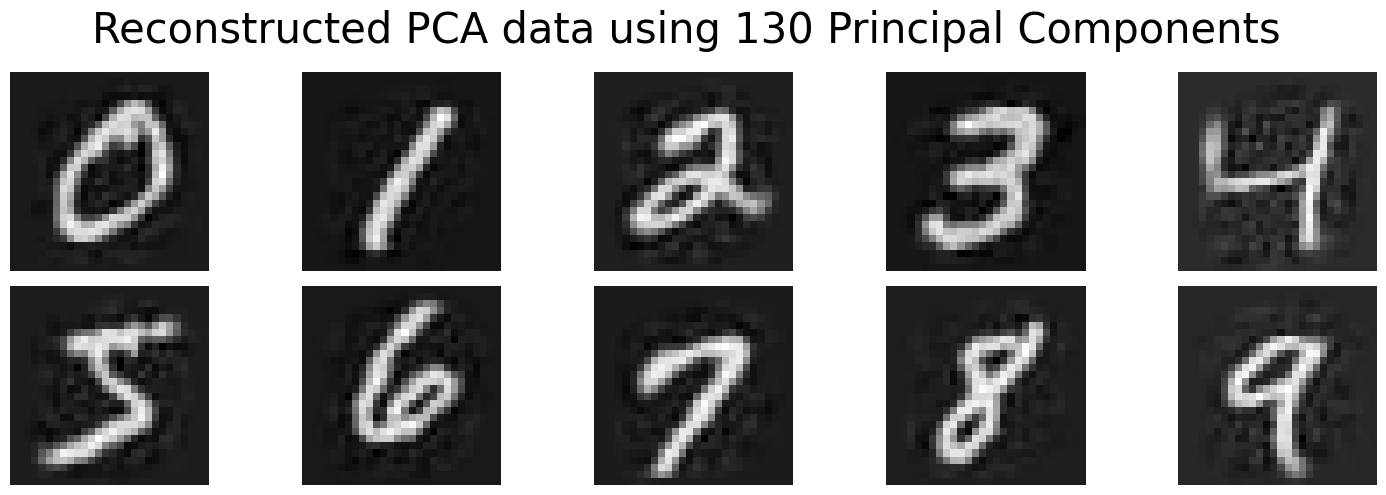

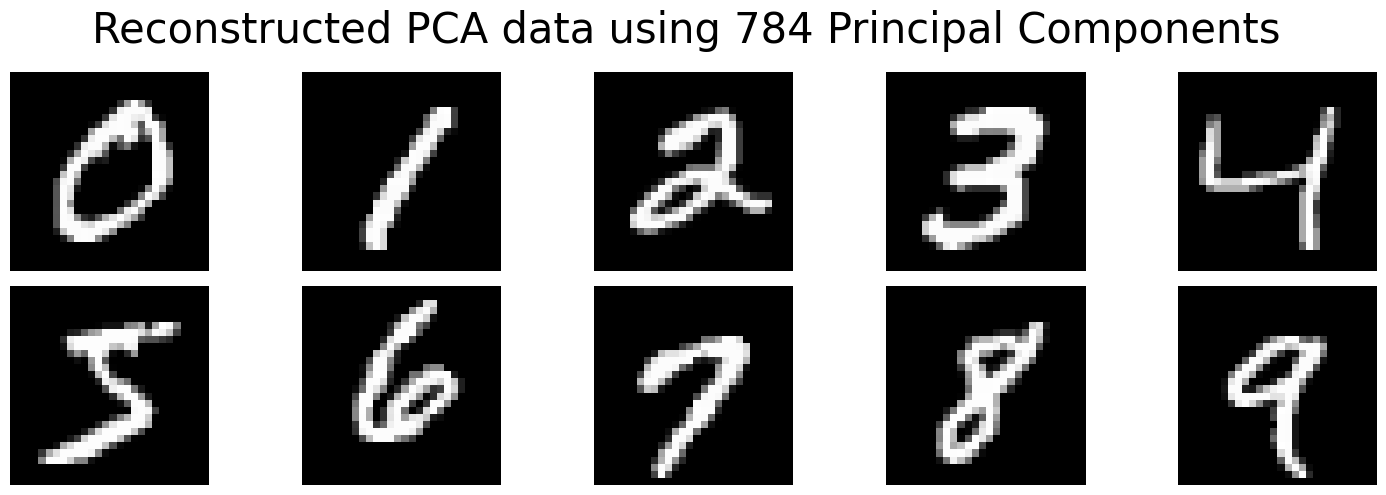

In [14]:
Num_of_Components_Array = [ 25 , 60 , 90 , 130 , 784]
for Num_of_Components in Num_of_Components_Array :
    fig , axes = plt.subplots(2 , 5 , figsize = (15, 5))

    Compressed_PCA_Data = np.full(( Num_of_sample_images,Num_of_Components ) , 0 , dtype= 'float64')

    #Finding the Compressed Data after the Principal Component Analysis(PCA) by finding the (eigenvector[j]_transpose * datapoint) for all datapoints
    for i in range(Num_of_sample_images):
        for j in range(Num_of_Components):
            Compressed_PCA_Data[i][j] = np.dot(eigenvectors[:,j] , X_data[:,i]) 

    #Recovering the data of the image from the compressed PCA data
    After_PCA_Data  = np.full((Num_of_sample_images,Num_of_Dimensions ), 0,dtype='float64' )

    for i in range(Num_of_sample_images):
        for j in range(Num_of_Components):
            After_PCA_Data[i] +=  ((Compressed_PCA_Data[i][j]))* eigenvectors[:,j]

    #Decentralising the data i.e adding the mean of all the datapoints
    for j in range(Num_of_sample_images):
        After_PCA_Data[j] = np.add(After_PCA_Data[j] , X_mean)

    #Plotting the first data point obtained after PCA for each number 
    for i in range(0,Num_of_sample_images,100):
        axes[(i//100)//5][(i//100)%5].imshow(After_PCA_Data[i].reshape(28,28) , cmap= 'gray')
        axes[(i//100)//5][(i//100)%5].axis('off')
    fig.suptitle(f"Reconstructed PCA data using {Num_of_Components} Principal Components " , fontsize =30)
    fig.tight_layout()
    '''plt.savefig(f"Reconstructed PCA data using {Num_of_Components} Principal Components")'''   
    plt.show()
   